In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def was_counter_chosen(row):
    """Did the meta_bot choose a bot that counters the opponent most often"""
    if row['bot0'] != "meta_bot": # if meta_bot plays, meta_bot is guaranteed to be bot0
        row['picked_counter'] = np.nan
        row['n_counters'] = np.nan
        return(row)
    else:


        match_id = row['match_id']
        seed = row['seed']
        opponent = row['bot1']
        round_robin = df_results.query('seed == %i and (bot0 == "%s" or bot1 == "%s") and bot0 != "meta_bot" and bot1 != "meta_bot"' % (seed, opponent, opponent))
        vs = round_robin[['bot0', 'bot1']].values
        played_against = [match[0] if match[1] == 'opponent' else match[1] for match in vs]

        winner = round_robin['winner'].tolist()

        opponent_countered_by = [] # bots that counter the opponent
        for bot, winner_bot in zip(played_against, winner):
            if winner_bot != opponent: # the opponent lost to this bot
                opponent_countered_by.append(bot)        

        agent_history = df_chosen_agents.query('match_id == %i' % match_id)
        vc = agent_history['agent'].value_counts()

        # proportion of time the meta bot picks an agent that counters the opponent
        row['picked_counter'] = vc[vc.index.isin(opponent_countered_by)].sum() / agent_history.shape[0]
        row['n_counters'] = len(opponent_countered_by) / (len(played_against) + 1) # len(opponents) + 1 bc agent does counter itself
        return(row)
    
df_results = pd.read_csv('seed_experiments/results.csv')
df_chosen_agents = pd.read_csv('seed_experiments/chosen_agents.csv')
df_results = df_results.apply(was_counter_chosen, axis=1)
df_results

,algo,seed,match_id,bot0,city_tiles0,units0,bot1,city_tiles1,units1,winner,picked_counter,n_counters
0,EXP3PP,1,100000,meta_bot,0,0,working_title,27,34,working_title,0.294118,0.500000
1,EXP3PP,1,100001,meta_bot,0,0,imitation_tb,1,8,imitation_tb,0.000000,0.000000
2,EXP3PP,1,100002,meta_bot,12,8,imitation_dr,0,0,meta_bot,0.229032,0.250000
3,EXP3PP,1,100003,meta_bot,3,3,imitation_rl,3,4,imitation_rl,0.245125,0.750000
4,EXP3PP,1,100004,working_title,0,0,imitation_tb,18,13,imitation_tb,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
775,NEXP,4439413,100855,meta_bot,15,15,imitation_dr,3,3,meta_bot,0.186630,0.333333
776,NEXP,4439413,100856,meta_bot,7,9,imitation_rl,11,11,imitation_rl,0.665738,0.666667
777,NEXP,4439413,100857,imitation_tb,17,17,imitation_dr,5,6,imitation_tb,NaN,NaN
778,NEXP,4439413,100858,imitation_tb,24,26,imitation_rl,0,0,imitation_tb,NaN,NaN


In [65]:
df_meta_results = df_results.query('match_id < 100600 and bot0 == "meta_bot"')
df_meta_results

,algo,seed,match_id,bot0,city_tiles0,units0,bot1,city_tiles1,units1,winner,picked_counter,n_counters
0,EXP3PP,1,100000,meta_bot,0,0,working_title,27,34,working_title,0.294118,0.500000
1,EXP3PP,1,100001,meta_bot,0,0,imitation_tb,1,8,imitation_tb,0.000000,0.000000
2,EXP3PP,1,100002,meta_bot,12,8,imitation_dr,0,0,meta_bot,0.229032,0.250000
3,EXP3PP,1,100003,meta_bot,3,3,imitation_rl,3,4,imitation_rl,0.245125,0.750000
10,EXP3PP,2,100010,meta_bot,16,16,working_title,0,2,meta_bot,0.481894,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
509,NEXP,202180674,100582,meta_bot,19,19,imitation_dr,21,22,imitation_dr,0.220056,0.333333
510,NEXP,202180674,100583,meta_bot,13,22,imitation_rl,18,20,imitation_rl,0.350975,0.666667
514,NEXP,594017037,100591,meta_bot,9,9,imitation_tb,5,5,meta_bot,0.000000,0.000000
515,NEXP,594017037,100592,meta_bot,0,0,imitation_dr,17,17,imitation_dr,0.012552,0.333333


Plot proportion of times the selected agent counters the opponent, vs. the proportion of available arms that counter the opponent


""


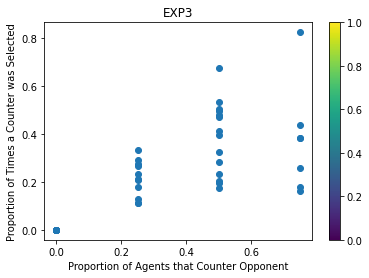

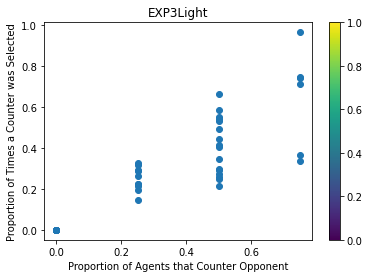

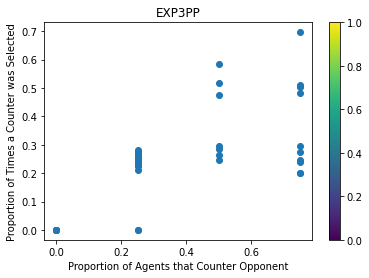

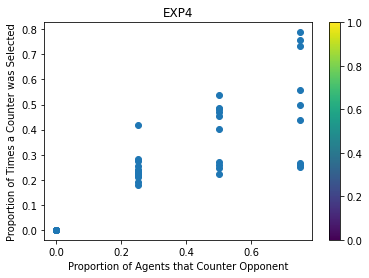

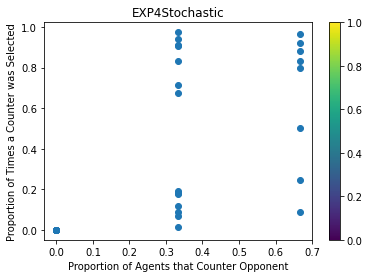

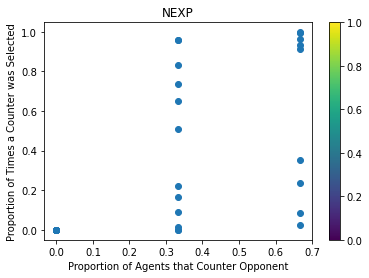

In [68]:
def plot_counters(group):
    algo = group['algo'].iloc[0]
    plt.figure()
#     plt.hist2d(group['n_counters'], group['picked_counter'])
    plt.scatter(group['n_counters'], group['picked_counter'])
    plt.xlabel('Proportion of Agents that Counter Opponent')
    plt.ylabel('Proportion of Times a Counter was Selected')
    plt.title(algo)
    plt.colorbar()
print('Plot proportion of times the selected agent counters the opponent, vs. the proportion of available arms that counter the opponent')
df_meta_results[['algo', 'picked_counter', 'n_counters']].groupby(['algo']).apply(plot_counters)